In [1]:
import os
from string import digits

import numpy
import scipy
#import Image
#import kiwisolver
import matplotlib #Had to reinstall Pillow 
import matplotlib.pyplot as plt
import seaborn

import re

import sys
import pandas
import random
import math

import sklearn
#from sklearn.model_selection import metrics
from sklearn import linear_model
from sklearn.model_selection import cross_validate
#from sklearn.cross_validation import cross_val_score
#from sklearn.model_selection import metrics

import time,datetime
from mpl_toolkits import mplot3d
from matplotlib.text import TextPath
from matplotlib.patches import PathPatch
from matplotlib.font_manager import FontProperties
from matplotlib import cm
import operator #include this
from operator import itemgetter
import logomaker

In [15]:

MouseZP3_UnAlig = 'VKVECLEAELVVTVSRDLFGTGKLVQPGDLTLGSEGCQPRVSVDTDVVRFNAQLHECSSRVQMTKDALVYSTFLLHDPRPVSGLSILRTNRVEVPIECRYPR'
#RatZP3_Alig = '-VE-VECKE-----A---E---------------LVVT----VRRDL-FGTG-K-L----------------------------------------VQP-------GD-L---TL-G--SE--------G-CQ--------------P-LVAV----D-T--------DVVRLNAQLH-E----------------CSSG-------VQVT----------------------E-D----A-L-VYS--TF-LLHD-PRPV------------------------N-GLSILRTN--RV-E--V------PIE-CRY-P-R-------'
#RatZP3_Alig = '--VKVECLEA-ELVVT--VS---R------D--------------------L-F---GT----------------------------GK-LV--------------Q-PG-D---LT-L--G----SEG-C-------------------------Q--PRVS-VD---------T--D-VV--RFN-----A-Q-LH---------ECSSR--V--Q--M---T--KD-------------------AL---VYST-FL--LH-D----P------RPVS-----------G-----L---SI-LRTNR--VEVP-----IECRY-PR'
#This is the renewed alignment

RatZP3_Alig = '-VKVECLEA-E--L-------VV---------T---------V------S-RDLFG----T-------------------------------------GK-----------LV----Q--P---G------------------D---LT-L------------GSE-------------------------------------------------------------------------G-CQP--R-----V-S----VD--T--D---V-------------VRFNAQL------------HEC-------SSRV--Q---M---------T-----------------------K-D----AL-----VY-STF----LL---H---------------D--PR----P-V--S--G-LS------I------L---RTNR-----VEVP-----IECR-YPR'






MouseZP2ZPN1_UnAlig='GTLICDKDEVRIEFSSRFDMEKWNPSVVDTLGSEILNCTYALDLERFVLKFPYETCTIKVVGGYQVNIRVGDTTTDVRYKDDMYHFFCPAIQ'



#RatZP2ZPN_Alig='-GT-LICDK-----D---E---------------VRVE----FSSRF-D----M-E-KW-----------------------------------N-PSL--VD-TFGN-E---IS--------------------------------N-CTYA----L-DLEK-------FILKFPYE-T----------------C----------TIKV----------------------I-G----G-Y-QVN--IR-V--Q-DTNA------D-----------------V------SYK--DD-V--H------HFF-CPA-I-Q-------'
#RatZP2ZPN_Alig = '--GTLICDKD-EVRIE--FS---S------R--------------------F-D---M------------------------------------------------E-KW-N---PS-V--V----D-----------------------------T--LGSEILNC-TYAL--DL--E-RF--VLK-----F-P-YE---------TCTI------K--V---V--G-------------------------GYQV-NI--RV-G----D------TTT-----------------------D-VRYKD--DMYH-----FFCPA-IQ'
#New PSI-BLAST based alignment 

RatZP2ZPN_Alig = '-GTLICDKD-E--V-------RI---------E---------F------S-SRF---------------------------------------------------------DM----E--K---W------------------N---PS-V------------VDT-------------------------L---------G----SE-----------------------I------LN-CTY--A-----L-D-----------L-E-R-------------FVLKFPY------------ETC-------T--I--K---V---------V-------------------------------G-----GY-QVN----IR---V---------------G--DT----T----------T------D------V---RYKD-----DMYH-----FFCP-AIQ'


In [16]:
os.chdir(r'C:\Users\alber\OneDrive\Documents\Swanson_2017Onward\Sequences\ZP_Alignments')


#UnReg=pandas.read_csv('Unreg_LogoDat_202104191127.csv')
#Logo_df=pandas.read_csv('PseudoLogo_UseDat_202104191127.csv')
#Logo_One=pandas.read_csv('LogoDatOne_202105241957.csv')
#Logo_X=pandas.read_csv('LogoDatX_202105241957.csv')
#Logo_M=pandas.read_csv('LogoDatM_202105241957.csv')

#Logo_One=pandas.read_csv('LogoDatOne_202105312238.csv')
#Logo_X=pandas.read_csv('LogoDatX_202105312238.csv')
#Logo_M=pandas.read_csv('LogoDatM_202105312238.csv')



CleanUnReg = pandas.read_csv('CleanUnReg_LogoDat_202112131147.csv')








In [17]:
#CleanLogoOne = pandas.read_csv('CleanLogoOne_202201101701.csv')
#CleanLogoX = pandas.read_csv('CleanLogoX_202201101701.csv')
#CleanLogoM = pandas.read_csv('CleanLogoM_202201101701.csv')


CleanLogoOne = pandas.read_csv('CleanLogoOne_202201250018.csv')

CleanLogoX = pandas.read_csv('CleanLogoX_202201250018.csv')

CleanLogoM = pandas.read_csv('CleanLogoM_202201250018.csv')

In [18]:
CleanLogoX


,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0
1,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0
2,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0
3,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0
4,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0
106,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0
107,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0
108,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0.0


In [19]:
'''
BothGap=[]
FineSite=[]

for i in numpy.arange(len(RatZP3_Alig)):
    if RatZP3_Alig[i]=='-' and RatZP2ZPN_Alig[i] == '-' and RatZP2N2_Alig[i] == '-':
        BothGap.append(i)
    else:
        #print(sum(Logo_df.iloc[i,])) #Not I lose one of my parameters because it falls in a gap
        FineSite.append(i)

        
CleanLogoOne=Logo_One.iloc[FineSite,:].reset_index(drop=True) 
CleanLogoX=Logo_X.iloc[FineSite,:].reset_index(drop=True) 
CleanLogoM=Logo_M.iloc[FineSite,:].reset_index(drop=True) 

CleanUnReg=UnReg.iloc[FineSite,:].reset_index(drop=True) 
#CleanLogo
'''

"\nBothGap=[]\nFineSite=[]\n\nfor i in numpy.arange(len(RatZP3_Alig)):\n    if RatZP3_Alig[i]=='-' and RatZP2ZPN_Alig[i] == '-' and RatZP2N2_Alig[i] == '-':\n        BothGap.append(i)\n    else:\n        #print(sum(Logo_df.iloc[i,])) #Not I lose one of my parameters because it falls in a gap\n        FineSite.append(i)\n\n        \nCleanLogoOne=Logo_One.iloc[FineSite,:].reset_index(drop=True) \nCleanLogoX=Logo_X.iloc[FineSite,:].reset_index(drop=True) \nCleanLogoM=Logo_M.iloc[FineSite,:].reset_index(drop=True) \n\nCleanUnReg=UnReg.iloc[FineSite,:].reset_index(drop=True) \n#CleanLogo\n"

In [20]:
aa_pi = {'G':5.97, 'A':6.00, 'V':5.96, 'L':5.98,
        'I':6.02, 'M':5.74, 'P':6.30, 'F':5.48,
        'W':5.89, 'N':5.41, 'Q':5.65, 'S':5.68,
        'T':5.60, 'Y':5.66, 'C':5.07, 'D':2.77,
        'E':3.22, 'K':9.74, 'R':10.76, 'H':7.59}

aa_sorted = sorted(aa_pi, key=lambda x:aa_pi[x], reverse=True)
colors = cm.turbo(numpy.linspace(0.1,0.9,20))
#print(colors)
print([x[:-1] for x in colors]) 
#colors=[x[:-1] for x in colors] #Remove last entry which is always a 1?
aa_colors = dict(zip(aa_sorted,colors))


[array([0.26967, 0.34878, 0.79631]), array([0.27698, 0.46153, 0.93309]), array([0.26252, 0.56967, 0.99773]), array([0.20708, 0.66866, 0.97423]), array([0.13278, 0.77165, 0.8858 ]), array([0.09287, 0.85875, 0.7724 ]), array([0.13526, 0.92197, 0.66556]), array([0.2618 , 0.96765, 0.52981]), array([0.41229, 0.99268, 0.39826]), array([0.57357, 0.99817, 0.27712]), array([0.69525, 0.9761 , 0.21294]), array([0.80473, 0.92452, 0.20459]), array([0.89112, 0.85826, 0.2188 ]), array([0.96049, 0.77181, 0.22811]), array([0.99314, 0.67408, 0.20348]), array([0.99297, 0.55214, 0.15417]), array([0.96555, 0.42241, 0.09798]), array([0.92105, 0.31489, 0.05475]), array([0.8538 , 0.2217 , 0.02677]), array([0.76476, 0.14374, 0.01041])]


In [21]:
#"-"*11
aa_colors

{'R': array([0.26967, 0.34878, 0.79631, 1.     ]),
 'K': array([0.27698, 0.46153, 0.93309, 1.     ]),
 'H': array([0.26252, 0.56967, 0.99773, 1.     ]),
 'P': array([0.20708, 0.66866, 0.97423, 1.     ]),
 'I': array([0.13278, 0.77165, 0.8858 , 1.     ]),
 'A': array([0.09287, 0.85875, 0.7724 , 1.     ]),
 'L': array([0.13526, 0.92197, 0.66556, 1.     ]),
 'G': array([0.2618 , 0.96765, 0.52981, 1.     ]),
 'V': array([0.41229, 0.99268, 0.39826, 1.     ]),
 'W': array([0.57357, 0.99817, 0.27712, 1.     ]),
 'M': array([0.69525, 0.9761 , 0.21294, 1.     ]),
 'S': array([0.80473, 0.92452, 0.20459, 1.     ]),
 'Y': array([0.89112, 0.85826, 0.2188 , 1.     ]),
 'Q': array([0.96049, 0.77181, 0.22811, 1.     ]),
 'T': array([0.99314, 0.67408, 0.20348, 1.     ]),
 'F': array([0.99297, 0.55214, 0.15417, 1.     ]),
 'N': array([0.96555, 0.42241, 0.09798, 1.     ]),
 'C': array([0.92105, 0.31489, 0.05475, 1.     ]),
 'E': array([0.8538 , 0.2217 , 0.02677, 1.     ]),
 'D': array([0.76476, 0.14374, 

In [22]:
residues = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L',
           'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
#Luckily it's all in alphabetical order so I can just take the index from this list

In [23]:
def GetSeq(CleanLogo):

    ModSeq='' #Keeping unnecessary names
    FreeSeq=''

    
    for i in numpy.arange(len(CleanLogo)):
        Take=CleanLogo.iloc[i,]
        if (sum(Take!=0.0))==0.0:
            #Remember that the sum of Trues (non-zero values) is 0
            ModSeq+='-'
            FreeSeq+='-'
        else:
            #print(Take.index(min(Take)))
            VminI, Vmin =min(enumerate(Take), key=operator.itemgetter(1)) #With enumerate I output both the index and value

            VmaxI, Vmax=max(enumerate(Take), key=operator.itemgetter(1))
            #print(Take)
            #print(Vmin,Vmax)
            if Vmin <0:
                FreeSeq+=residues[VminI] #Testing
                #print(VminI)
            else:
                FreeSeq+='-'
            if Vmax > 0:
                ModSeq+=residues[VmaxI]
                #print(VmaxI)
            else:
                ModSeq+='-'
    return(ModSeq)





In [24]:
#Make Sequences for modular and free
OneSeq=GetSeq(CleanLogoOne)
XSeq=GetSeq(CleanLogoX)
MSeq=GetSeq(CleanLogoM)
print(OneSeq+'\n',XSeq+'\n',MSeq)

-------------------------------------------G----------------------------G-----------------------L-------------
 -------------------------------------------------------G------------------------------------------------------
 ----------------------------L-------------------------------------------------------------------N-------------


In [25]:
len(OneSeq)

110

In [26]:
def UnTransform(ProcDat):
    
    NewDat = ProcDat.copy(deep=True)
    
    for i in numpy.arange(len(NewDat)):
        for j in numpy.arange(len(NewDat.iloc[i,:])):
            #print(ProcDat.iloc[i,j])
            
            if NewDat.iloc[i,j] > 0.0 :
                NewDat.iloc[i,j] = numpy.log(1.0+NewDat.iloc[i,j])
            elif NewDat.iloc[i,j] < 0.0:
                NewDat.iloc[i,j] = -1.0*numpy.log(1.0-NewDat.iloc[i,j])
    
    return(NewDat)
   

[]

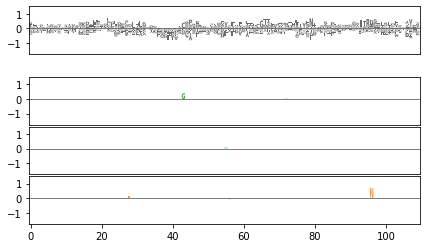

In [27]:

gridspec = dict(hspace=0.05, height_ratios=[1, 0.4,1, 1,1])
fig3, ax3 = plt.subplots(5 , gridspec_kw=gridspec)
ax3[1].set_visible(False)
fig3.set_size_inches(7,4)

#TestSeq="VKV"+('-'*(len(CleanUnReg)-3))
TestSeq="L"*len(CleanUnReg)

#Original Colors
#MCol=[1,0.69,0.52]
#XCol=[0.611,1,0.611]
#OneCol=[0.15,0.66,0.15]

#Brighter Colors

MCol=[1,0.58,0.18]
XCol=[0.18,0.83,0.42]
OneCol=[0.15,0.66,0.15]



#logomaker.Logo(CleanUnReg, ax =ax3[0], color_scheme=aa_colors)
#L1=logomaker.Logo(CleanUnReg, ax =ax3[0], color_scheme='dimgrey')
#L1.style_glyphs_in_sequence(sequence=MSeq,color=[1,0.69,0.52]) 
#L1.style_glyphs_in_sequence(sequence=XSeq,color=[0.611,1,0.611]) 
#L1.style_glyphs_in_sequence(sequence=OneSeq,color=[0.15,0.66,0.15]) 

L1=logomaker.Logo(UnTransform(CleanUnReg), ax =ax3[0], color_scheme='dimgrey')
L1.style_glyphs_in_sequence(sequence=MSeq,color=MCol) 
L1.style_glyphs_in_sequence(sequence=XSeq,color=XCol) 
L1.style_glyphs_in_sequence(sequence=OneSeq,color=OneCol) 



#L2=logomaker.Logo(CleanLogoOne, ax =ax3[1], color_scheme=aa_colors)
#L2.style_glyphs_in_sequence(sequence=OneSeq,color=[0.15,0.66,0.15]) 

L2=logomaker.Logo(UnTransform(CleanLogoOne), ax =ax3[2], color_scheme='dimgrey') #Introducing empty row
L2.style_glyphs_in_sequence(sequence=OneSeq,color=OneCol) 

#L3=logomaker.Logo(CleanLogoX, ax =ax3[2], color_scheme=aa_colors)
#L3.style_glyphs_in_sequence(sequence=XSeq,color=[0.611,1,0.611]) 

L3=logomaker.Logo(UnTransform(CleanLogoX), ax =ax3[3], color_scheme='dimgrey')
L3.style_glyphs_in_sequence(sequence=XSeq,color=XCol) 

#L4=logomaker.Logo(CleanLogoM, ax =ax3[3], color_scheme=aa_colors)
#L4.style_glyphs_in_sequence(sequence=MSeq,color=[1,0.69,0.52]) 

L4=logomaker.Logo(UnTransform(CleanLogoM), ax =ax3[4], color_scheme='dimgrey') #Making this first after nonreg Changing numbering
L4.style_glyphs_in_sequence(sequence=MSeq,color=MCol) 





#ax3[0].set_ylim(-2,1.5)
#ax3[1].set_ylim(-2,1.5)
#ax3[2].set_ylim(-2,1.5)
#ax3[3].set_ylim(-2,1.5)

ax3[0].set_ylim(-1.75,1.5)
ax3[2].set_ylim(-1.75,1.5)
ax3[3].set_ylim(-1.75,1.5)
ax3[4].set_ylim(-1.75,1.5)

ax3[0].set_xticks([])
ax3[2].set_xticks([])
ax3[3].set_xticks([])
#fig3.tight_layout()
#Add X and Y labels


#fig3.subplots_adjust(hspace=0.05)

#fig3.savefig('MultiClassLogo_ColorOnGray_202201250045V2.png',dpi=600)